# An Exploratory Data Analysis on Movie Data

### Eric Au

<img src="https://thewell.unc.edu/wp-content/uploads/sites/1007/2020/04/film1.jpg" width="400" length = "400"/>

## The Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 

What is the demographic of successful movies and how well do they do in the box office? 

The goal is to explore the types of films that are currently doing the best in the box office and translate these findings into actionable insights for Microsoft's new movie studio. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import Image

# Preview the following data tables

Lets have a glimpse at the data tables available.

## The Numbers - Budgets Table

In [2]:
# will use this table to analyze budget and gross values
budgets = pd.read_csv('data_files/tn.movie_budgets.csv')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Extracting Tables from IMDB Using SQL

The following tables will be extracted using sqlite3 and have been collected from the IMDB movie database. 

In [3]:
# import sqlite3 to access IMDB database
import sqlite3 
conn = sqlite3.connect('data_files/im.db')

In [4]:
# Refer to Movie Data ERD
Image(url="images/movie_data_erd.jpeg", width=700, height=700)

In [5]:
# Access movie_basics table for example
pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
# Access movie_basics table for example
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Based on the available tables and data within the columns, I will use the budgets and IMDB database to perform an analysis on movie data. 

Here are some potential things to explore further:

- What is the distribution of movie runtimes? What are the average ratings for this distribution of movies?
- What are the most frequent genre movie types?
- When do movies typically make the most profit? Throughout the year? Throughout the past 60 years (accounting for modern movies)?
- What are the most profitable movie genres? 
- What are the top 10 most profitable movies? What makes these movies so profitable?

# Data Cleaning

## IMDB Table
### Join the movie ratings and movie basics tables

In [7]:
# Join on movie_id and create a new dataframe called 'imdb'
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING ("movie_id")
;
""", conn)

imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
# check new imdb table data types
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
# check numerical data values
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


Based on the above glimpses into the combined IMDB dataset, the following can be observed:
- There are missing values for the `runtime_minutes` and `genres columns`.
- The dataset includes information for movies between 2010 and 2019 (inclusive). 
- There are some outliers in the `runtime_minutes` column. We have movies that have a runtime of 3 minutes as a minimum and a runtime of 51,420 minutes (or 857 hours). Additionally, the `numvotes` column has a maximum value count that far exceeds the 75% percentile; thus indicating another outlier. 

### Check missing values

In [10]:
# determine count of missing values in table
imdb.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [11]:
# percentage of missing values in runtime_minutes
imdb['runtime_minutes'].isna().value_counts(normalize = True)

False    0.896826
True     0.103174
Name: runtime_minutes, dtype: float64

In [12]:
# percentage of missing values in genres
imdb['genres'].isna().value_counts(normalize = True)

False    0.989114
True     0.010886
Name: genres, dtype: float64

Since there are so few missing values relative to the size of the overall dataset, I will drop the rows with missing values under `genres`. 

We'll call this new dataset `imdb_clean`.

In [13]:
imdb_clean = imdb
imdb_clean

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [14]:
# drop rows in genres column where there is a null value
imdb_clean.dropna(subset = ['genres'], inplace = True)

In [15]:
# double check rows are dropped from genres
imdb_clean.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7332
genres                0
averagerating         0
numvotes              0
dtype: int64

Lets check distribution of the `runtime_minutes` column. 

Mean: 94.7322732805843
Median: 91.0


/Users/eric/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/eric/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


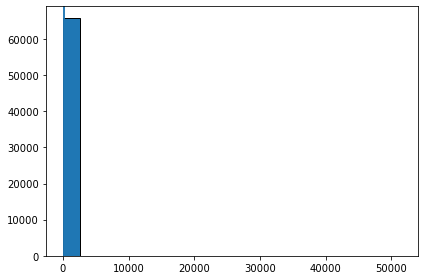

In [16]:
plt.hist(imdb_clean['runtime_minutes'], bins = 20, edgecolor = "black")

plt.axvline(imdb_clean['runtime_minutes'].mean())
plt.axvline(imdb_clean['runtime_minutes'].median())

plt.tight_layout()

print('Mean:', imdb_clean['runtime_minutes'].mean())
print('Median:', imdb_clean['runtime_minutes'].median())

This distribution is clearly not right. The outliers observed in the early glimpse of the IMDB dataset have influenced the distribution of the values in the `runtime_minutes` columns.

Lets now remove these outliers. 

In [17]:
# find the row where the outlier exists
imdb_clean.loc[imdb['runtime_minutes'] == 51420]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17


In [18]:
# Drop the indexed value of 70280
imdb_clean.drop(70280)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


Mean: 94.7322732805843
Median: 91.0


/Users/eric/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/eric/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


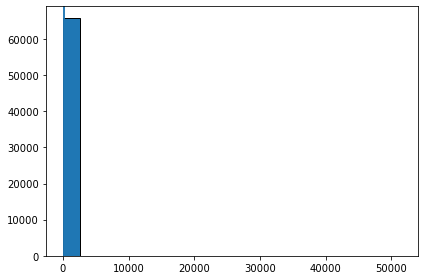

In [19]:
# replot distribution
plt.hist(imdb_clean['runtime_minutes'], bins = 20, edgecolor = "black")

plt.axvline(imdb_clean['runtime_minutes'].mean())
plt.axvline(imdb_clean['runtime_minutes'].median())

plt.tight_layout()

print('Mean:', imdb_clean['runtime_minutes'].mean())
print('Median:', imdb_clean['runtime_minutes'].median())

There doesn't seem to be a change in the distribution? Why is this? There must still be values we are not seeing that are possibly additional outliers. 

Lets now check for the total amount of movies where the runtime is greater than 180 minutes or 3 hours. Using general knowledge, most movies are typically not longer than 3 hours. 

In [20]:
# find rows where runtime is greater than 180 minutes (3 hours)
imdb_clean.loc[imdb_clean['runtime_minutes'] > 180]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
60,tt0396123,Den milde smerte,Den milde smerte,2010,280.0,Drama,7.8,6
64,tt0403645,Burnt by the Sun 2,Utomlennye solntsem 2,2010,181.0,"Drama,History,War",4.1,3907
260,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
776,tt10244756,Ang hupa,Ang hupa,2019,276.0,Sci-Fi,7.2,5
1052,tt1113829,George Harrison: Living in the Material World,George Harrison: Living in the Material World,2011,208.0,"Biography,Documentary,Music",8.2,9372
...,...,...,...,...,...,...,...,...
72452,tt9055926,National Theatre Live: King Lear,National Theatre Live: King Lear,2018,227.0,Drama,8.6,135
72572,tt9097864,My Thesis Film: A Thesis Film by Erik Anderson,My Thesis Film: A Thesis Film by Erik Anderson,2018,233.0,Drama,8.4,5
73022,tt9318514,Reason,Vivek,2018,261.0,Documentary,9.0,44
73388,tt9573980,Leaving Neverland,Leaving Neverland,2019,240.0,Documentary,7.1,19632


In [21]:
# percentage of movies longer than 3 hours
print((len(imdb_clean.loc[imdb['runtime_minutes'] > 180])/ len(imdb_clean))* 100)

0.32990198762525325


There are exactly 241 rows of data where the runtime of the movie is greater than 3 hours or 180 minutes. In the grand scheme of things, this represents about 0.33% of the dataset. 

We can reasonably remove these rows from the IMDB table now. 

In [22]:
# remove rows in IMDB where runtime_minutes is greater than 180 minutes
imdb_clean = imdb_clean[imdb_clean['runtime_minutes'] < 180]
imdb_clean

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


Great, now we have 65,434 rows of data. We have also removed the null values in the `runtime_minutes` column. 

In [23]:
# double check null counts
imdb_clean.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Mean: 93.06935232447962
Median: 91.0


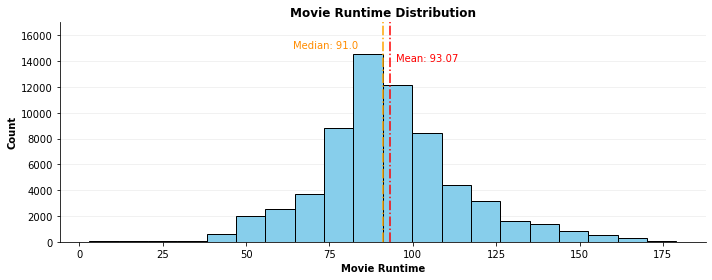

In [24]:
# replot distribution
# set figure
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(imdb_clean['runtime_minutes'], 
        bins = 20, 
        edgecolor = "black", 
        color = "skyblue")

# set y limit a bit higher for readability
ax.set_ylim([0, 17000])

# label median, mean with vertical lines
ax.axvline(imdb_clean['runtime_minutes'].mean(), c = 'r', linestyle = "-.")
ax.axvline(imdb_clean['runtime_minutes'].median(), c = 'orange', linestyle = "-.")

# label median, mean 
ax.annotate(xy = (imdb_clean['runtime_minutes'].median()-27, 15000), c = 'darkorange', text = 'Median: 91.0' )
ax.annotate(xy = (imdb_clean['runtime_minutes'].mean() + 2, 14000), c = 'red', text = 'Mean: 93.07' )

# set title and axis labels
ax.set_title("Movie Runtime Distribution", weight = "bold")
ax.set_xlabel('Movie Runtime', weight = "bold")
ax.set_ylabel('Count', weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('movieruntimedist.png', facecolor='w')


print('Mean:', imdb_clean['runtime_minutes'].mean())
print('Median:', imdb_clean['runtime_minutes'].median())

We see that we now have a more normally distributed representation of the dataset with the mean closer to the median. Additionally, we notice that the median (91) has not changed from the original IMDB dataset and that the mean however, has decreased (93) once the outliers and null values have been removed front the data. 

Overall, the movie runtime column has been cleaned but more importantly, we observe that most movies have an average runtime of about 93 minutes, or 1 hour and 33 minutes. 

### Distribution of Average IMDB Movie Ratings

Since there are so many values clustered around and on top of one another, lets use a violin map to represent the distribution of average IMDB ratings. 

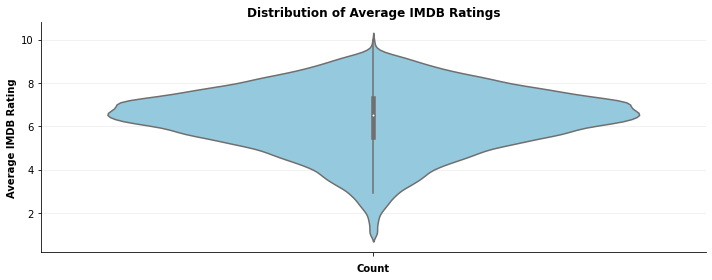

In [25]:
# set up figure
fig, ax = plt.subplots(figsize=(10, 4))

# plot violin plot showint distribution of average rating data
fig = sns.violinplot(y = imdb_clean["averagerating"], 
                     color = "skyblue")

# set labels
ax.set_title("Distribution of Average IMDB Ratings", weight = "bold")
ax.set_ylabel('Average IMDB Rating', weight = "bold")
ax.set_xlabel('Count', weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('violinratingplot.png', facecolor='w')

We see that most movies are clustered between 80 minutes and 100 minutes of runtime based on the movie runtime distribution from earlier. 

We also can see that movies with a 90 minute runtime generally have an average IMDB rating of 7. 

### What is the relationship between number of votes for a movie and average rating? 

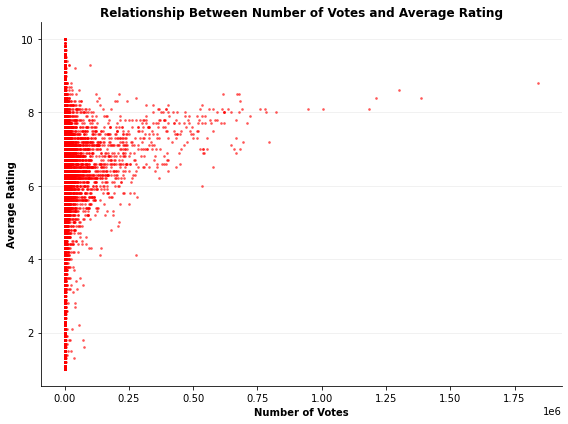

In [26]:
# set figure
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

x = imdb_clean['numvotes']
y = imdb_clean['averagerating']

scatter = ax.scatter(x, 
                     y,
                     c = 'red',
                     s = 3,
                     alpha = 0.5)

# set labels and title
ax.set_xlabel('Number of Votes', weight = "bold")
ax.set_ylabel('Average Rating', weight = "bold")
ax.set_title('Relationship Between Number of Votes and Average Rating', weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('numvotes_vs_averagerating.png', facecolor='w')


Taking a look at the relationship between number of votes for a movie vs. average rating, we instantly notice that there are many movies with less than 250,000 ratings. There seems to be a huge clustering around films with less than 100 votes. 

While we don't want to remove all the rows of data that are clusttered around this parameter, we can still notice that there is a *logarithmic* type relationship between votes and ratings. More number of votes for a movie tend to have a higher average rating. 

### What is the distribution of movie genres?

Lets do some more data cleaning with the IMDB dataset now that we have no more missing values. 
- First lets drop the `original_title` column and rename the `primary_title` to just `title` as this is redundant information. 

In [27]:
# drop original title column
imdb_clean = imdb_clean.drop(columns = ['original_title'])
imdb_clean.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [28]:
# rename primary_title as title
imdb_clean = imdb_clean.rename(columns = {'primary_title': 'title'})
imdb_clean.columns

Index(['movie_id', 'title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

Some movies have more than one genre associated with the movie. I'll create a new column called `genre_count` which classifies the movie based on number of genres. 

In [29]:
# create new column genre_count, and count number of genres for each movie
imdb_clean['genre_count'] = imdb_clean['genres'].map(lambda x: len(x.split(',')))

In [30]:
imdb_clean.head()

,movie_id,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_count
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,2
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,1
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,3
6,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,3


In [31]:
# whats the distribution of values for the newly generated genre_count table?
imdb_clean['genre_count'].value_counts(normalize = True)

1    0.468548
3    0.271801
2    0.259651
Name: genre_count, dtype: float64

Based on this information, most movies are classified by 1 genre (46.8%), then by 3 genres (27.1%), and then 2 genres (26%). 

### Movie Genre Classification

Since many movies have more than one classification of a genre, I will create a count of the major genre types that dominate the IMDB dataset. 

For the purposes of this analysis, I will examine the top 10 most **frequently occuring** genres in the IMDB dataset.  

In [32]:
# first perform a value counts of genres that appear in the dataset; get the top 20
imdb_clean['genres'].value_counts().head(20)

Drama                            10129
Documentary                       9059
Comedy                            4596
Comedy,Drama                      2449
Horror                            2229
Drama,Romance                     1389
Thriller                          1288
Comedy,Drama,Romance              1159
Comedy,Romance                    1125
Horror,Thriller                    941
Drama,Thriller                     937
Action                             719
Biography,Documentary              675
Documentary,Drama                  571
Documentary,Music                  540
Action,Crime,Drama                 530
Romance                            526
Comedy,Horror                      514
Crime,Drama,Thriller               493
Biography,Documentary,History      472
Name: genres, dtype: int64

Based on the values present in the genre column, the top 10 most frequently classified genres (without repeating) are the following: drama, documentary, comedy, horror, romance, thriller, action, biography, music, and crime. 

However, we see that there are genre values with repeating combinations of genres (ie. Document, Drama). In order to account for repeating genres in a classification, I'll create a count of string values for each of the top 10 genres if it exists within the column. 

In [33]:
# first create a list of containing all items in the genres column
genres_list = [genre for genre in imdb_clean['genres']]

# check to see first 5 items in the list
genres_list[:5]

['Action,Crime,Drama',
 'Biography,Drama',
 'Drama',
 'Comedy,Drama,Fantasy',
 'Adventure,Animation,Comedy']

In [34]:
# create a dictionary with a count value of 0 for the top ten genres
genre_dict = {'Drama':0, 
              'Documentary': 0, 
              'Comedy': 0, 
              'Horror':0, 
              'Romance':0,
              'Thriller':0,
              'Action':0,
              'Biography':0,
              'Music':0,
              'Crime':0}

In [35]:
# iterate through the genres list and create a count of the top genres and whether they appear in the genres_list
# if genre appears in the string value within list, add the amount of times to the dictionary value for the genre key
for genre in genres_list:
    if 'Drama' in genre:
        count_drama = genre.count('Drama')
        genre_dict['Drama'] += count_drama
    elif 'Documentary' in genre:
        count_doc = genre.count('Documentary')
        genre_dict['Documentary'] += count_doc
    elif 'Comedy' in genre:
        count_com = genre.count('Comedy')
        genre_dict['Comedy'] += count_com
    elif 'Horror' in genre:
        count_hor = genre.count('Horror')
        genre_dict['Horror'] += count_hor
    elif 'Romance' in genre:
        count_rom = genre.count('Romance')
        genre_dict['Romance'] += count_rom
    elif 'Thriller' in genre:
        count_thril = genre.count('Thriller')
        genre_dict['Thriller'] += count_thril
    elif 'Action' in genre:
        count_act = genre.count('Action')
        genre_dict['Action'] += count_act
    elif 'Biography' in genre:
        count_bio = genre.count('Biography')
        genre_dict['Biography'] += count_bio
    elif 'Music' in genre:
        count_music = genre.count('Music')
        genre_dict['Music'] += count_music
    elif 'Crime' in genre:
        count_crime = genre.count('Crime')
        genre_dict['Crime'] += count_crime

genre_dict

{'Drama': 28286,
 'Documentary': 14531,
 'Comedy': 9709,
 'Horror': 4717,
 'Romance': 819,
 'Thriller': 2695,
 'Action': 1771,
 'Biography': 192,
 'Music': 289,
 'Crime': 249}

In [36]:
# sort the genres descending
sorted_genres = sorted(genre_dict.items(), key=lambda x:x[1], reverse = True)

# reclassify sorted_genres as a dictionary
sorted_genres = dict(sorted_genres)

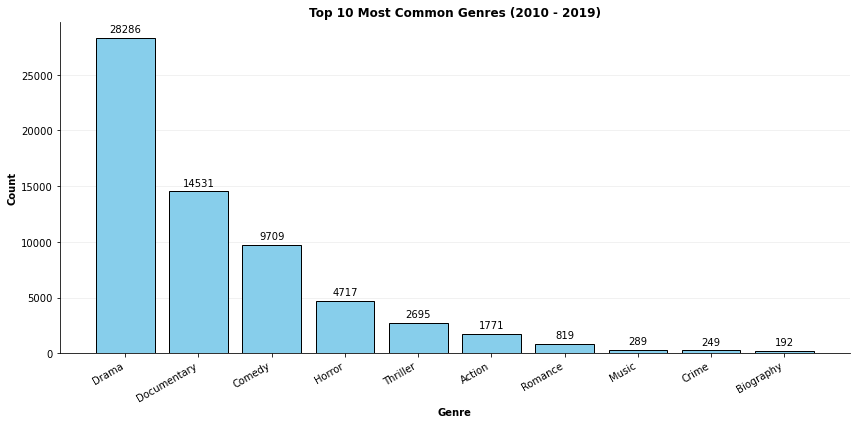

In [37]:
# # configure plot
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))

# plot 
bars = ax.bar(sorted_genres.keys(), 
              sorted_genres.values(),
              edgecolor = "black", 
              color = "skyblue")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 500,
      bar.get_height(),
      horizontalalignment='center',
      size = 10,
      color = 'black')

# set labels
ax.set_title("Top 10 Most Common Genres (2010 - 2019)", weight = "bold")
ax.set_ylabel("Count", weight = "bold")
ax.set_xlabel("Genre", weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# rotate xticks labels
plt.xticks(rotation=30, ha='right')

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('top10commongenres.png', facecolor='w')


We see that the top 10 most frequent movie genres are distributed as follows in the above bar chart. The most frequent movie genre is the drama which is then followed by the documentary genre. There is then a significant drop-off into comedy and then horror and thriller. 

While the bar graph does not account for every movie genre in the entire dataset, it does consider the most frequently classified genres and accounts for any repeated instances or combinations. 

# Movie Profits

So what exactly makes a movie **popular**? At the end of the day, we want to understand the amount of money spent (budget) and profits from that movie. 

Lets explore this further with the budgets table. 

A reminder of what the budgets table looks like:

In [38]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


I want to join the cleaned IMDB table with budgets table based on the name of the movie. However, before I do that, let's explore the budgets table and clean the data. 

In [39]:
# check for data type and missing data
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are no missing data from the budgets table, however, the datatype of the columns are incorrect. We expect the `production_budget` to be a integer rather than an object. Also the `release_date` can be converted to a date time type. 

We can also drop the `id` column since that doesn't appear to be a related key for the other tables I am using. 

In [40]:
# remove '$' from the dollar values in production_budget
budgets["production_budget"] = budgets["production_budget"].str.replace("$","")
budgets["domestic_gross"] = budgets["domestic_gross"].str.replace("$","")
budgets["worldwide_gross"] = budgets["worldwide_gross"].str.replace("$","")

# remove ',' from the dollar values in production_budget
budgets["production_budget"] = budgets["production_budget"].str.replace(",","")
budgets["domestic_gross"] = budgets["domestic_gross"].str.replace(",","")
budgets["worldwide_gross"] = budgets["worldwide_gross"].str.replace(",","")

In [41]:
# convert to type int
budgets = budgets.astype({"production_budget":"int64",
                          "domestic_gross":"int64",
                          "worldwide_gross":"int64"})

In [42]:
# convert to date time
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [43]:
# check cleaned data types
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [44]:
# drop id column
budgets = budgets.drop(['id'], axis = 1)

In [45]:
# check adjusted budgets df
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


While the budgets dataframe tells us some relevant finanical information, we can further expand on the values by creating new gross profit columns for domestic and worldwide. 

Additionally, we can simplify a classification for the movie based on whether the movie made a profit or not. 

In [46]:
# Create new gross profit columns 
budgets['domestic_profit'] = budgets['domestic_gross'] - budgets['production_budget']
budgets['worldwide_profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [47]:
# create made_profit column
budgets['profit?'] = budgets['worldwide_gross'] > 0

In [48]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit?
0,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,True
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,True
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,True
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,True
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,True


What is the percentage of movies that made a profit? 

In [49]:
made_profit = budgets['profit?'].value_counts(normalize = True)
made_profit

True     0.936527
False    0.063473
Name: profit?, dtype: float64

## Profits Over Time

Further expanding and cleaning the data set further; What is the best time to release a movie? Which months made the most money? What about years?

In [50]:
# create new column to isolate the year and month
budgets['year'] = budgets['release_date'].dt.year
budgets['month'] = budgets['release_date'].dt.month

In [51]:
# create list of months to relabel xticks
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# groups budgets by month for top worldwide profits
y1 = budgets.groupby('month')['worldwide_profit'].mean() 

# creates a zipped dictionary for months, and total worldwide profit for that month
zipped1 = dict(zip(months, y1))

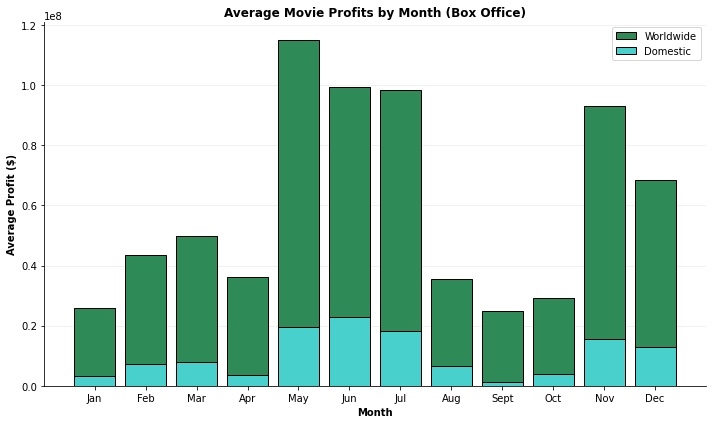

In [52]:
# configure plot
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# groups budgets by month for top worldwide profits
y2 = budgets.groupby('month')['domestic_profit'].mean() 

# creates a zipped dictionary for months, and total worldwide profit for that month
zipped2 = dict(zip(months, y2))

# plot stacked bar graph below
# bar graph 1 for Worldwide profits
ax.bar(zipped1.keys(),
       zipped1.values(),
       edgecolor = "black", 
       color = "seagreen",
       label='Worldwide')

# bar graph 2 for Domestic profits
ax.bar(zipped2.keys(),
       zipped2.values(),
       edgecolor = "black", 
       color = "mediumturquoise",
       label='Domestic')

# set labels
ax.set_title("Average Movie Profits by Month (Box Office)", weight = "bold")
ax.set_ylabel("Average Profit ($)", weight = "bold")
ax.set_xlabel("Month", weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# rotate xticks labels
plt.xticks(ha='center')

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.legend()
plt.tight_layout()
plt.savefig('movieprofits_by_month.png', facecolor='w')

plt.show()

Movies generate the most profit when released during the early/mid summer months and during November and December. 

This makes sense as most blockbluster movies are generally released in the summer and holiday seasons. This could be related to a variety of reasons. For example, more children are out of school and are likelier to go out to the movies. 

The months that should be avoided when releasing a movie are January and September. 

### Movie Profits Since 1960

While we have data from the IMDB table that is limited to just 2010-2019, the newly cleaned budgets table contains movie budget information that ranges from the early 1900s to 2020. See below. 

In [53]:
# sort release_date from earliest to latest
budgets.sort_values(by = 'release_date', ascending = True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit?,year,month
5677,1915-02-08,The Birth of a Nation,110000,10000000,11000000,9890000,10890000,True,1915,2
5523,1916-09-05,Intolerance,385907,0,0,-385907,-385907,False,1916,9
5614,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,7800000,True,1916,12
5683,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,2900000,True,1920,9
5606,1925-11-19,The Big Parade,245000,11000000,22000000,10755000,21755000,True,1925,11
...,...,...,...,...,...,...,...,...,...,...
2329,2019-12-31,Reagan,25000000,0,0,-25000000,-25000000,False,2019,12
3312,2019-12-31,Rogue City,13000000,0,0,-13000000,-13000000,False,2019,12
535,2020-02-21,Call of the Wild,82000000,0,0,-82000000,-82000000,False,2020,2
1205,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,-50000000,False,2020,12


Lets limit the data to more modern movies post 1960 and see if there are any noticeable trends in movie profits. 

In [54]:
# create new dictionaries that groups total worldwide and domestic profits by year
profits_world_dict = dict(budgets.groupby('year')['worldwide_profit'].mean())

In [55]:
# create a new dictionary that includes key, value pairs after year 1960
new_profits_dict = {}

for (year, value) in profits_world_dict.items():
    if year >= 1960:
        new_profits_dict[year] = value

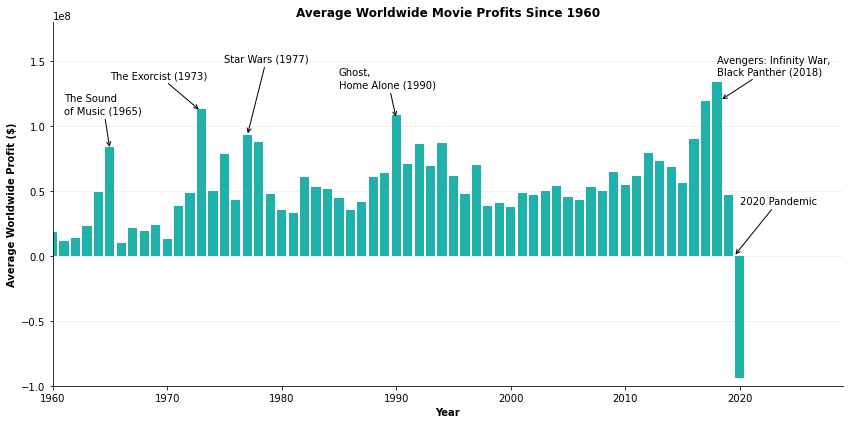

In [56]:
# configure plot
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))


# # plot bar graph
bars = ax.bar(new_profits_dict.keys(),
              new_profits_dict.values(), 
              color = "lightseagreen")

# set labels
ax.set_title("Average Worldwide Movie Profits Since 1960", weight = "bold")
ax.set_ylabel("Average Worldwide Profit ($)", weight = "bold")
ax.set_xlabel("Year", weight = "bold")
# ax.set_xticklabels(sorted_years)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# # set x & y limits a bit higher for readability
ax.set_xlim([1960, 2029])
ax.set_ylim([-100000000, 180000000])

# rotate xticks labels
plt.xticks(ha='center')

# annotate 2020 pandemic
ax.annotate('2020 Pandemic', xy=(2019.5, 1000), xytext=(2020, 40000000),
            arrowprops={'arrowstyle':'->'})

# annotate 1965
ax.annotate('The Sound\nof Music (1965)', xy=(1965, 82500000), xytext=(1961, 110000000),
            arrowprops={'arrowstyle':'->'})

# annotate 1973
ax.annotate('The Exorcist (1973)', xy=(1972.9, 112000000), xytext=(1965, 137000000),
            arrowprops={'arrowstyle':'->'})

# annotate 1977
ax.annotate('Star Wars (1977)', xy=(1977, 93000000), xytext=(1975, 150000000),
            arrowprops={'arrowstyle':'->'})


# annotate 1990
ax.annotate('Ghost,\nHome Alone (1990)', xy=(1990, 105900000), xytext=(1985, 130000000),
            arrowprops={'arrowstyle':'->'})

# annotate 2018
ax.annotate('Avengers: Infinity War,\nBlack Panther (2018)', xy=(2018.3, 120000000), xytext=(2018, 140000000),
            arrowprops={'arrowstyle':'->'})


# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('averageprofits_since1960.png', facecolor='w')
plt.show()

There has been a steady rise in worldwide movie profits from 1960 up until 1990. 

Noticeably, there is a drop off in profit after 2019 as the 2020 pandemic halted the movie industry and no one was able to go to the theaters. 

In [57]:
# sort release_date from earliest to latest 
budgets.sort_values(by = 'release_date', ascending = True).tail(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit?,year,month
2329,2019-12-31,Reagan,25000000,0,0,-25000000,-25000000,False,2019,12
3312,2019-12-31,Rogue City,13000000,0,0,-13000000,-13000000,False,2019,12
535,2020-02-21,Call of the Wild,82000000,0,0,-82000000,-82000000,False,2020,2
1205,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,-50000000,False,2020,12
194,2020-12-31,Moonfall,150000000,0,0,-150000000,-150000000,False,2020,12


Upon closer investigation, there were only 3 movies released in 2020; and all 3 movies did not make a profit. This could also be related to missing data. However, we know now that in 2020, movie releases were few and far between. 

Additionally, we can isolate the spikes in worldwide profits by searching within the dataset for the years where the spikes occur. For example, in 1965, "The Sound of Music" had the highest worldwide profit for that year. 

In [58]:
# to search up movies by year and sort by most worldwide profit 
budgets[(budgets['year'] == 1965)].sort_values(by = 'worldwide_profit', ascending = False).head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit?,year,month
3859,1965-03-02,The Sound of Music,8200000,163214286,286214286,155014286,278014286,True,1965,3
3771,1965-12-29,Thunderball,9000000,63600000,141200000,54600000,132200000,True,1965,12
3466,1965-12-22,Doctor Zhivago,11000000,111897830,112036323,100897830,101036323,True,1965,12
4199,1965-03-07,The Train,5800000,6800000,6800000,1000000,1000000,True,1965,3
4573,1965-04-07,Major Dundee,3800000,14873,14873,-3785127,-3785127,True,1965,4


### Merging IMDB and Budgets Tables

The next step is to ceate a new combined table analyzing movie budgets with cleaned IMDB table. Since there are no primary keys available, we will join the two tables where the movie names are the same AND where the release years are the same.

In [59]:
# Merge the budgets table with the imdb_clean table on an inner join. 
combined = pd.merge(budgets, imdb_clean, how = "inner", left_on = ["movie", "year"], right_on = ["title", "start_year"])

In [60]:
# check shape, we now have 1,489 rows and 18 columns of data 
combined.shape

(1489, 18)

In [61]:
# drop unneeded redundant columns 
combined = combined.drop(['movie_id','title','year','start_year'], axis = 1)

In [62]:
# check combined df
combined.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,profit?,month,runtime_minutes,genres,averagerating,numvotes,genre_count
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,True,5,136.0,"Action,Adventure,Fantasy",6.6,447624,3
1,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,True,6,113.0,"Action,Adventure,Sci-Fi",6.0,24451,3
2,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,True,5,141.0,"Action,Adventure,Sci-Fi",7.3,665594,3


## Genres with the most profit?
Recall `sorted_genres` gives the top 10 most frequently occuring genres in the IMDB table. 

In [63]:
# return top 10 most frequently occuring genres
sorted_genres.keys()

dict_keys(['Drama', 'Documentary', 'Comedy', 'Horror', 'Thriller', 'Action', 'Romance', 'Music', 'Crime', 'Biography'])

In [64]:
# put keys into a list
top_genres_list = list(sorted_genres.keys())
top_genres_list

['Drama',
 'Documentary',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Romance',
 'Music',
 'Crime',
 'Biography']

In [65]:
# create a dictionary with a count value of 0 for the top ten genres
genre_profits = {'Drama':0, 
              'Documentary': 0, 
              'Comedy': 0, 
              'Horror':0, 
              'Romance':0,
              'Thriller':0,
              'Action':0,
              'Biography':0,
              'Music':0,
              'Crime':0}

In [66]:
# locate rows in combined where the specific genre is True in 'genres'. Find the average of the worldwide_profits for that genre if True
drama_profit = combined.loc[combined['genres'].str.contains("Drama") == True]['worldwide_profit'].mean()
doc_profit = combined.loc[combined['genres'].str.contains("Documentary") == True]['worldwide_profit'].mean()
comedy_profit = combined.loc[combined['genres'].str.contains("Comedy") == True]['worldwide_profit'].mean()
horror_profit = combined.loc[combined['genres'].str.contains("Horror") == True]['worldwide_profit'].mean()
thriller_profit = combined.loc[combined['genres'].str.contains("Thriller") == True]['worldwide_profit'].mean()
action_profit = combined.loc[combined['genres'].str.contains("Action") == True]['worldwide_profit'].mean()
romance_profit = combined.loc[combined['genres'].str.contains("Romance") == True]['worldwide_profit'].mean()
music_profit = combined.loc[combined['genres'].str.contains("Music") == True]['worldwide_profit'].mean()
crime_profit = combined.loc[combined['genres'].str.contains("Crime") == True]['worldwide_profit'].mean()
bio_profit = combined.loc[combined['genres'].str.contains("Biography") == True]['worldwide_profit'].mean()


In [67]:
# create a genre_profits dictionary with genre keys and average profits as values
genre_profits = {'Drama':drama_profit, 
              'Documentary': doc_profit, 
              'Comedy': comedy_profit, 
              'Horror': horror_profit, 
              'Romance': romance_profit,
              'Thriller': thriller_profit,
              'Action': action_profit,
              'Biography': bio_profit,
              'Music': music_profit,
              'Crime': crime_profit}

In [68]:
# sort the profits and recast as a dictionary
sorted_profits = dict(sorted(genre_profits.items(), key=lambda x:x[1], reverse = True))

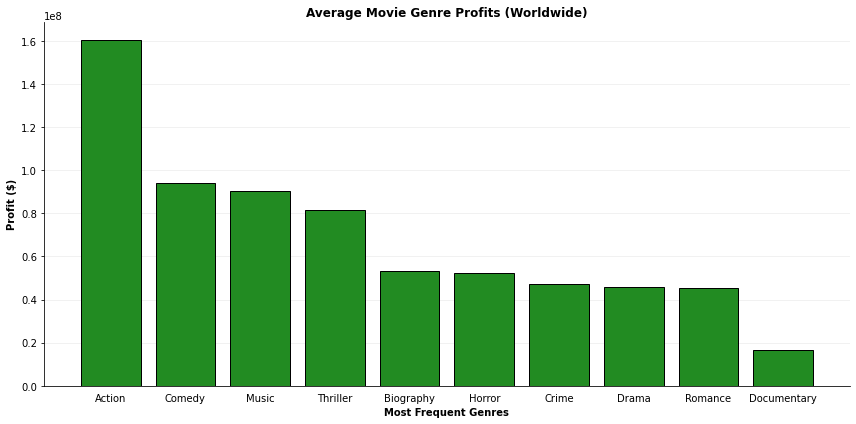

In [69]:
# configure plot
# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))

# plot stacked bar graph below
# bar graph 1 for Worldwide profits
ax.bar(sorted_profits.keys(),
       sorted_profits.values(),
       edgecolor = "black", 
       color = "forestgreen")

# set labels
ax.set_title("Average Movie Genre Profits (Worldwide)", weight = "bold")
ax.set_ylabel("Profit ($)", weight = "bold")
ax.set_xlabel("Most Frequent Genres", weight = "bold")

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# rotate xticks labels
plt.xticks(ha='center')
# Remove the ticks
ax.tick_params(bottom=False)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('genreprofits.png', facecolor='w')
plt.show()



While drama and documentary genre films are the most frequently occurring movie genre in the dataset, action movies generate the highest average profit. There is a drop off in average profits after action movies. 

## Top 20 Profit Movies

So what are the top profit movies? We can expect that based on earlier visual analysis that these movies are either action or comedy movies. Additionally, these movies likely have released within the last 10-20 years based on the average worldwide movie profits. 

In [70]:
# select top 20 movies and sort by domestic_profit descending
top_20 = combined.sort_values(by = ['worldwide_profit'], ascending = False).head(20)

# only include relevant column information
top_20 = top_20[['movie',
                 'release_date',
                 'domestic_profit', 
                 'worldwide_profit', 
                 'genres', 
                 'averagerating', 
                 'runtime_minutes']]

In [71]:
top_20

,movie,release_date,domestic_profit,worldwide_profit,genres,averagerating,runtime_minutes
3,Avengers: Infinity War,2018-04-27,378815482,1748134200,"Action,Adventure,Sci-Fi",8.5,149.0
23,Jurassic World,2015-06-12,437270625,1433854864,"Action,Adventure,Sci-Fi",7.0,124.0
46,Furious 7,2015-04-03,163007020,1328722794,"Action,Crime,Thriller",7.2,137.0
18,The Avengers,2012-05-04,398279547,1292935897,"Action,Adventure,Sci-Fi",8.1,143.0
27,Black Panther,2018-02-16,500059566,1148258224,"Action,Adventure,Sci-Fi",7.3,134.0
77,Jurassic World: Fallen Kingdom,2018-06-22,247719760,1135772799,"Action,Adventure,Sci-Fi",6.2,128.0
108,Frozen,2013-11-22,250738009,1122469910,"Adventure,Animation,Comedy",7.5,102.0
95,Beauty and the Beast,2017-03-17,344014165,1099199706,"Family,Fantasy,Musical",7.2,129.0
290,Minions,2015-07-10,262045770,1086336173,"Adventure,Animation,Comedy",6.4,91.0
2,Avengers: Age of Ultron,2015-05-01,128405868,1072413963,"Action,Adventure,Sci-Fi",7.3,141.0


Based on the data for the Top 20 profitting movies, we see that 'Black Panther' generated the greatest profit worldwide. We also can tell that the dominating genre amongst the top 20 are action, adventure, and sci-fi movies. 

Lets visualize this below. 

In [73]:
# plot top 20 movies and their profits. Color group the movies by genre
fig = px.bar(top_20, 
       x = 'worldwide_profit',
       y = 'movie', 
       color = 'genres',
       orientation = 'h',
       title="Top 20 Movies Based On Profit",
       labels={'movie':'Movie Name', 'worldwide_profit': 'Worldwide Profit',
              'genres':'Genres'})

fig.update_layout(
    title={
        'text': "Top 20 Movies Based On Profit",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
plt.show()

We can clearly see that of the top 20 movies that profitted the most, half of the movies are classified under the action, adventure, sci-fi. 

While we expected action and comedy movies to be the highest profiting movies, we see action, adventure, and sci-fi on this list instead. Why is this? 

Well in the original cleaned IMDB dataset, we were accounting for an average of the movie profit for the top 10 most *frequently* occuring genres and not for EVERY single genre available in the data. For the purposes of this analysis, it is important to note that the monetary values in the data set have not been adjusted for inflation.

# Recommendations: 

Based on observations from visual representations of the various data retrieved regarding movies, Microsoft Studios should look to produce films that have the following characteristics and target the following demographics:

- 90 minute movie runtimes generally yield a favorable rating of 7/10
- Produce movies that focus on action, adventure, or sci-fi. These genres produced over half of the top 20 most profitable movies. 
- Target the student or kid demographic. More people have more time during the summer and holiday seasons and are more inclined to go to a theater. More people = greater profit for the studio. 
- Market the movie worldwide. Worldwide movies generate far more in profit than when consumed domestically. 

# Next Steps:

While the data we have available can help us measure previous movie information, there are some additional steps we can take to provide a more detailed analysis. 

- Continue to collect data for movies post 2020. Are we starting to see the movie and theater industry recover? Are people returning back to the theater?
- Adjust movie data for inflation. While measuring profits can be helpful, we can get a better relative sense of monetary performance in the box office when adjusting profits for inflation. 
- Collect additional data to help explain cyclical cycles in the movie industry over the years. Could there be other reasons why we see spikes in some years where movie profits were exceptionally high? 